Trained weights for population density:  [-2.04931791  0.93672368]
Train weights for income per capita
Trained weights for income per capita:  [0.16402818 0.43006787]


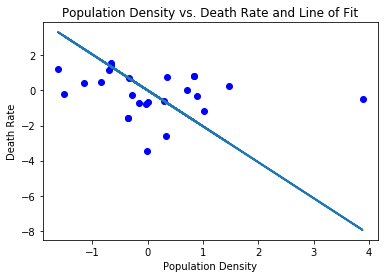

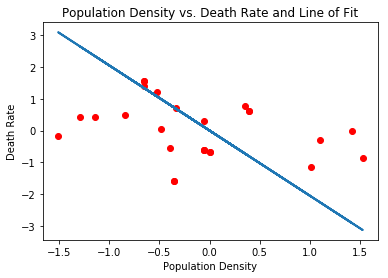

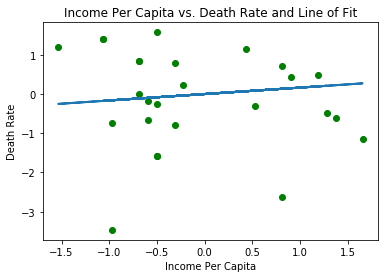

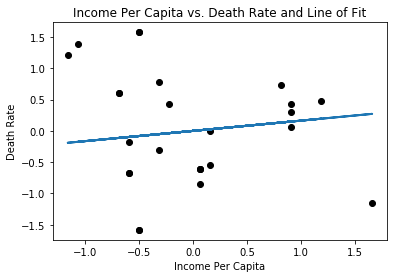

In [146]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

hc_raw = pd.read_csv("HealthInCities.csv")
for clmn in hc_raw:
    col_mean = np.mean(hc_raw[clmn])
    col_stdev = np.std(hc_raw[clmn])
    hc_raw[clmn] = (hc_raw[clmn] - col_mean)/col_stdev
    
hc_raw["norm_ones"] = 0
p = .2 #Training Rate
trng_data = hc_raw.sample(frac=0.5, replace=True)
test_data = hc_raw.sample(frac=0.5, replace=True)

Y_train = trng_data.iloc[:, 0].values
X_train = trng_data[['PopulationDensity', 'norm_ones']].values
X_train1 = trng_data[['IncomePerCapita', 'norm_ones']].values

Y_test = test_data.iloc[:, 0].values
X_test = test_data[['PopulationDensity', 'norm_ones']].values
X_test1 = test_data[['IncomePerCapita', 'norm_ones']].values

def chkWeights(x_i, y_i, w):
   ypred = predict(x_i, w)   # The predicted target
   error = y_i - ypred       
   return w + p * (y_i - ypred) * x_i  # Update the weights

def predict(x_i, w):
   return 1/(1+np.exp(-1 * np.dot(w.T, x_i)))

def SGD(X,y):
    w = np.array([random.random() for x in range(X.shape[1])])
    w_temp = w
    epoch = 0
    while epoch <= 1000:
        for i, x_i in enumerate(X):
            w = chkWeights(x_i, y[i], w)
        pred = 1/(1+np.exp(-1 * np.dot(X, w)))
        error = np.sum(pred - y[i])
        epoch += 1
        if np.sum(np.abs(w_temp - w)) < 0.0001:
            #print('Epoch : ', epoch)
            #print('Error : ', error)
            return w
        else: 
            w_temp = w
    return w

w = SGD(X_train,Y_train)
print('Trained weights for population density: ', w)
print('Train weights for income per capita')
w1 = SGD(X_train1,Y_train)
print('Trained weights for income per capita: ', w1)

for i, x in enumerate(X_test):
    predT = 1/(1+np.exp(-1 * np.dot(x, w)))
    error = np.sum(predT - Y_test[i])
    #print(error)

train_pred = [sum(X_train[i] * w) for i in range(X_train.shape[0])]
plt.plot(trng_data['PopulationDensity'], Y_train, 'bo')
plt.plot(trng_data['PopulationDensity'], train_pred, linewidth=2)
plt.title("Population Density vs. Death Rate and Line of Fit")
plt.xlabel("Population Density")
plt.ylabel("Death Rate")
plt.show() 

test_pred = [sum(X_test[i] * w) for i in range(X_test.shape[0])]
plt.plot(test_data['PopulationDensity'], Y_test, 'ro')
plt.plot(test_data['PopulationDensity'], test_pred, linewidth=2)
plt.title("Population Density vs. Death Rate and Line of Fit")
plt.xlabel("Population Density")
plt.ylabel("Death Rate")
plt.show() 

train_pred1 = [sum(X_train1[i] * w1) for i in range(X_train1.shape[0])]
plt.plot(trng_data['IncomePerCapita'], Y_train, 'go')
plt.plot(trng_data['IncomePerCapita'], train_pred1, linewidth=2)
plt.title("Income Per Capita vs. Death Rate and Line of Fit")
plt.xlabel("Income Per Capita")
plt.ylabel("Death Rate")
plt.show() 

test_pred1 = [sum(X_test1[i] * w1) for i in range(X_test1.shape[0])]
plt.plot(test_data['IncomePerCapita'], Y_test, 'ko')
plt.plot(test_data['IncomePerCapita'], test_pred1, linewidth=2)
plt.title("Income Per Capita vs. Death Rate and Line of Fit")
plt.xlabel("Income Per Capita")
plt.ylabel("Death Rate")
plt.show() 

The w value, which are the weights that are calculated by adjusting the error rate to minimize, are different for different set of training data. The w values change for each training run and also based on the feature being used to train.

Here in the above code we calculate the weights twice, once for population density and once for income per capita as the features ased on which the death rate needs to be predicted.